# Data Exploration and Analysis

## Reference

Some example code used (with modification) from https://medium.com/@datanizing/modern-text-mining-with-python-part-1-of-5-introduction-cleaning-and-linguistics-647f9ec85b6a

## Initial Setup and Imports

All packages used in this notebook are imported here and basic configuration options are set.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

## Load Data into Pandas

This is the cleaned data file that was created in the previous, Data Preparation notebook.

In [3]:
df = pd.read_csv("C:\git\CSML1010-Group_11-Final-Project\proposal\Tweets_cleaned.csv") 
    

## Basic Properties of the Dataset

Here we examine the features in the data set, including the new ones created in the previous notebook.

In [4]:
# list column names and datatypes
df.dtypes

tweet_id                                          int64  
airline_sentiment                                 object 
airline_sentiment_confidence                      float64
negativereason                                    object 
negativereason_confidence                         float64
airline                                           object 
text                                              object 
text_cleaned                                      object 
emojis_flag                                       bool   
emojis                                            object 
emoticons_flag                                    bool   
emoticons                                         object 
text_cleaned_without_emojis_emoticons             object 
hashtags                                          object 
text_cleaned_without_emojis_emoticons_hashtags    object 
text_cleaned_lower_case                           object 
text_cleaned_no_abbreviations                     object 
text_list_no_s

In [5]:
# select a sample of some data frame columns
df[['airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'text']] \
  .sample(10, random_state=0)

airline_sentiment  airline_sentiment_confidence          negativereason  \
13983  negative         0.62                           Late Flight              
14484  negative         0.70                           Bad Flight               
6403   negative         1.00                           Cancelled Flight         
9653   negative         1.00                           Can't Tell               
13268  negative         1.00                           Customer Service Issue   
2384   neutral          1.00                           NaN                      
9613   negative         0.67                           Customer Service Issue   
11612  negative         0.71                           Late Flight              
9252   negative         1.00                           Late Flight              
13923  negative         1.00                           Customer Service Issue   

       negativereason_confidence     airline  \
13983 0.62                        American     
14484 0.36                        American     
6403  1.00                        Southwest    
9653  1.00                        US Airways   
13268 1.00                        American     
2384  nan                         United       
9613  0.34                        US Airways   
11612 0.71                        US Airways   
9252  1.00                        US Airways   
13923 1.00                        American     

                                                                                                                                                        text  
13983  @AmericanAir In car gng to DFW. Pulled over 1hr ago - very icy roads. On-hold with AA since 1hr. Can't reach arpt for AA2450. Wat 2 do?                
14484  @AmericanAir after all, the plane didn’t land in identical or worse) conditions at GRK according to METARs.                                            
6403   @SouthwestAir can't believe how many paying customers you left high and dry with no reason for flight Cancelled Flightlations Monday out of BDL! Wow.  
9653   @USAirways I can legitimately say that I would have rather driven cross country than flown on US Airways.                                              
13268  @AmericanAir still no response from AA. great job guys!                                                                                                
2384   @united we have developers flying down tmrw morn. w/45 min layover, there is an earlier flight to have 1.5hr layover, can move them up?                
9613   @USAirways hello??? Anyone there?                                                                                                                      
11612  @USAirways @husainhaqqani Mr. Husain u shld protest as well when one of ur party member Rehman Malik delayed a PIA flight for hours..???               
9252   @USAirways not likely, flightaware says plane is still in Durango and hasn't departed.                                                                 
13923  @AmericanAir they don't even give an option to hold.. Just say lines are busy Plz try Late Flightr

In [6]:
# length of a dataframe (# of rows/unique tweets)
len(df)

14640

In [7]:
# number of values per column
df.count()

tweet_id                                          14640
airline_sentiment                                 14640
airline_sentiment_confidence                      14640
negativereason                                    9178 
negativereason_confidence                         10522
airline                                           14640
text                                              14640
text_cleaned                                      14637
emojis_flag                                       14640
emojis                                            14640
emoticons_flag                                    14640
emoticons                                         14640
text_cleaned_without_emojis_emoticons             14636
hashtags                                          14640
text_cleaned_without_emojis_emoticons_hashtags    14637
text_cleaned_lower_case                           14637
text_cleaned_no_abbreviations                     14637
text_list_no_stop_words                         

In [8]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   tweet_id                                        14640 non-null  int64  
 1   airline_sentiment                               14640 non-null  object 
 2   airline_sentiment_confidence                    14640 non-null  float64
 3   negativereason                                  9178 non-null   object 
 4   negativereason_confidence                       10522 non-null  float64
 5   airline                                         14640 non-null  object 
 6   text                                            14640 non-null  object 
 7   text_cleaned                                    14637 non-null  object 
 8   emojis_flag                                     14640 non-null  bool   
 9   emojis                                 

## Exploring Column Summaries

The pandas `describe` method computes statistical summaries for each of the columns of a dataframe. The results are different for categorical and numerical features.

### Summary for Categorical Features

Based on an initial examination of the data set, we've identified the 'airline_sentiment', 'negativereason', 'airline' and 'text' columns as the interesting categorial features. The other columns contain data that is either too incomplete to use, or is not revelant to our stated problem.

In [9]:
columns = [col for col in df.columns]
columns

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'text',
 'text_cleaned',
 'emojis_flag',
 'emojis',
 'emoticons_flag',
 'emoticons',
 'text_cleaned_without_emojis_emoticons',
 'hashtags',
 'text_cleaned_without_emojis_emoticons_hashtags',
 'text_cleaned_lower_case',
 'text_cleaned_no_abbreviations',
 'text_list_no_stop_words',
 'lemmas_list']

In [10]:
# describe categorical columns of type np.object 
df[['airline_sentiment', 'negativereason', 'airline', 'text']] \
  .describe(include=np.object) \
  .transpose()

count unique                     top  freq
airline_sentiment  14640  3      negative                9178
negativereason     9178   10     Customer Service Issue  2910
airline            14640  6      United                  3822
text               14640  14427  @united thanks          6

In [11]:
df['airline_sentiment'].value_counts()[:10]

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [12]:
df['negativereason'].value_counts()[:10]

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight               847 
Lost Luggage                   724 
Bad Flight                     580 
Flight Booking Problems        529 
Flight Attendant Complaints    481 
longlines                      178 
Damaged Luggage                74  
Name: negativereason, dtype: int64

In [13]:
df['airline'].value_counts()[:10]

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline, dtype: int64

In [14]:
df['text'].value_counts()[:10]

@united thanks                                                   6
@SouthwestAir sent                                               5
@AmericanAir thanks                                              5
@JetBlue thanks!                                                 5
@united thank you!                                               4
@AmericanAir thank you!                                          4
@SouthwestAir thank you!                                         3
@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏    3
@USAirways thank you                                             3
@SouthwestAir Thank you!                                         3
Name: text, dtype: int64

### Summary for Numerical Features

The primary numerical features in our data set are the tweet_id (a unique identifier - not useful to our problem), airline_sentiment_confidence	and negativereason_confidence. The latter two features do have significance to our problem as they indicate the confidence in the classification of a tweet to a particular sentiment (positive, negative, neutral) and the assignment of a particular reason (root cause) to negative tweets. We may want to look at this more closley as we work on the problem and chose to remove low-confidence rows.

In [15]:
# describe numerical columns
df.describe().transpose()

count                  mean  \
tweet_id                     14640.00 569218351767499200.00   
airline_sentiment_confidence 14640.00 0.90                    
negativereason_confidence    10522.00 0.64                    

                                            std                   min  \
tweet_id                     779111158481835.88 567588278875213824.00   
airline_sentiment_confidence 0.16               0.34                    
negativereason_confidence    0.33               0.00                    

                                               25%                   50%  \
tweet_id                     568559178101439488.00 569477857923110912.00   
airline_sentiment_confidence 0.69                  1.00                    
negativereason_confidence    0.36                  0.67                    

                                               75%                   max  
tweet_id                     569890473289000960.00 570310600460525568.00  
airline_sentiment_confidence 1.00                  1.00                   
negativereason_confidence    1.00                  1.00

## Plots

We'll examine the data set further by graphically plotting various key features.

### Airline Sentiment

The 'airline_sentiment' column is a classification of whether a tweet is considered 'positive', 'neutral' or 'negative'. A positive tweet is one that says something good or desirable about the airline. The airline would want to encourage these tweets if possible. A negative tweet is a complaint or a negative sentiment about the airline. One of the stated goals of this project is to identify these so that the airline can monitor closely. A neutral tweet is text that could not be classified either way.

The plot below shows the difference in frequency of these sentiment categories. As you can see, the data set is unbalanced, having significantly more negative sentiment tweets than the other two categories. This is a problem for accurate classification - especially if the new data we with to classify is balanced. That said - given our business problem, which is primarily focused on the early identification of negative tweet trends, the unbalanced nature of the data set is less of a concern. Since we do have a large number of negative examples, we can confidently identify negative cases. We will investigate the possibility of balancing the data set further using techniques such as over/under sampling if it is warranted.

In [16]:
sentByAirline = pd.DataFrame(df, columns = ['airline', 'airline_sentiment'])

plt.bar(sentByAirline['airline_sentiment'].loc[sentByAirline['airline_sentiment'] == 'positive'], \
        sentByAirline['airline_sentiment'].loc[sentByAirline['airline_sentiment'] == 'positive'].count(), \
        alpha=0.5, color='#0aa14e')

plt.bar(sentByAirline['airline_sentiment'].loc[sentByAirline['airline_sentiment'] == 'neutral'], \
        sentByAirline['airline_sentiment'].loc[sentByAirline['airline_sentiment'] == 'neutral'].count(), \
        alpha=0.5, color='#858585')

plt.bar(sentByAirline['airline_sentiment'].loc[sentByAirline['airline_sentiment'] == 'negative'], \
        sentByAirline['airline_sentiment'].loc[sentByAirline['airline_sentiment'] == 'negative'].count(), \
        alpha=0.5, color='#7a0606')
plt.title("Frequency of Airline Sentiment Categories")
plt.show()


### Airline Sentiment Confidence

These plots examine the distribution of another useful feature - confidence values for the choice of sentiment. A high confidence value indicates a large degree of certainty that the tweet has been classified correctly. A lower number indicates further uncertainty.

As you can see, the confidence is quite high for most of the data set, but there are some notable examples of low confidence classifications. We may want to remove the lower ranked classifications if we have sufficient data remaining for our models.

The three plots below examine the confidence value for Positive, Neutral and Negative sentiment classifications, in that order.

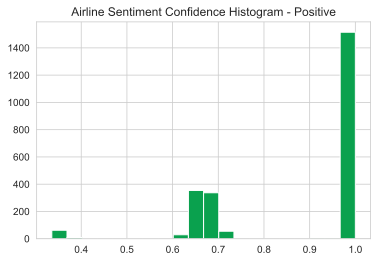

In [17]:
plt.hist(df['airline_sentiment_confidence'].loc[df['airline_sentiment'] == 'positive'], \
        bins = 20, alpha=1, color='#0aa14e')
plt.title("Airline Sentiment Confidence Histogram - Positive")
plt.show()

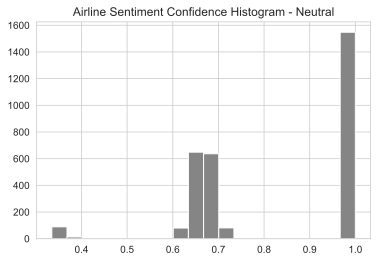

In [18]:
plt.hist(df['airline_sentiment_confidence'].loc[df['airline_sentiment'] == 'neutral'], \
        bins = 20, alpha=1, color='#858585')
plt.title("Airline Sentiment Confidence Histogram - Neutral")
plt.show()

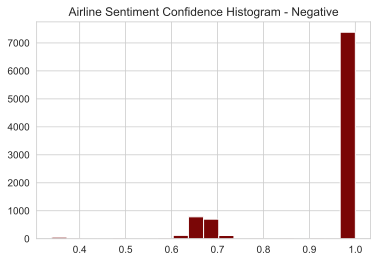

In [19]:
plt.hist(df['airline_sentiment_confidence'].loc[df['airline_sentiment'] == 'negative'], \
        bins = 20, alpha=1, color='#7a0606')
plt.title("Airline Sentiment Confidence Histogram - Negative")
plt.show()

### Reasons for Negative

This feature is an identified reason for the classification of a tweet as 'negative'. It required intepretation of the tweet and the assignment of a general category based on the overall problem or topic.

Having a good understanding of why people write negative tweets may help us model the data better, so it is important to explore these features.

The plot below graphs the frequency of the most common reasons for a negative sentiment tweet, in descending order.

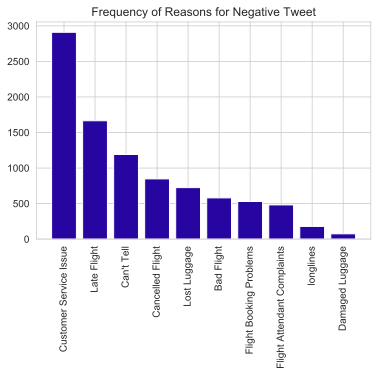

In [20]:
negativeReasonCount = Counter(df['negativereason'].loc[df['airline_sentiment'] == 'negative'])
negativeReasonCount.most_common(10)

#plt.hist(df['negativereason'].loc[df['airline_sentiment'] == 'negative'], \
#        bins = 10, alpha=1, color='#2705a1')
plt.bar(*zip(*negativeReasonCount.most_common()), color='#2705a1')

plt.title("Frequency of Reasons for Negative Tweet")
plt.xticks(rotation=90)
plt.show()

### Reasons for Negative Confidence

Similar to the airline sentiment confidence value, this value indicates the degree of confidence in the assignment of a specific reason for negative sentiment being assigned to a tweet. These values are almost all above 0.6 and most sit at nearly 1.0 so based on that data this is a fairly reliable classification.

Similar to the last metric, we may want to drop any low-value outliers to ensure the accuracy of our classification.

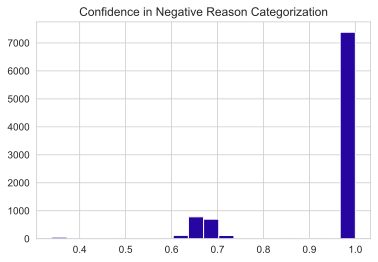

In [21]:
plt.hist(df['airline_sentiment_confidence'].loc[df['airline_sentiment'] == 'negative'], \
        bins = 20, alpha=1, color='#2705a1')
plt.title("Confidence in Negative Reason Categorization")
plt.show()

### Distribution of Airline

The 'airline' feature indicates the airline that the tweet in question is referring to or directed at. We don't yet have enough data to determine how the sentiment classification will differ between airlines (if at all) but it is important to know the distribution of tweets to airlines if we choose to act on that data.

A notable difference in the plot below is 'Virgin America' which we have significantly fewer tweets for than any other airline. Further analysis may be required to determine whether this is a data set limitation, or whether it is representative of the actual market share.

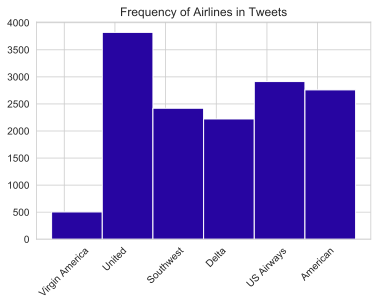

In [22]:
plt.hist(df['airline'], \
        bins=(np.arange(7) - 0.25), alpha=1, color='#2705a1')
plt.title("Frequency of Airlines in Tweets")
plt.xticks(rotation=45)
plt.show()

## Text Analysis

In this section we'll do some basic examination of the cleaned-up text in the form of word clouds. These visualizations allow us to see both the frequency and the variations of words occuring in the available text (all of the tweets combined).

### Word Cloud for All Tweets

The first word cloud has been created based on all words occurring in every tweet in the data set. In general, it should be representative of the 'average' tweet. Generic words such as 'flight', 'people', 'experience', 'trip', etc. occur as might be expected.

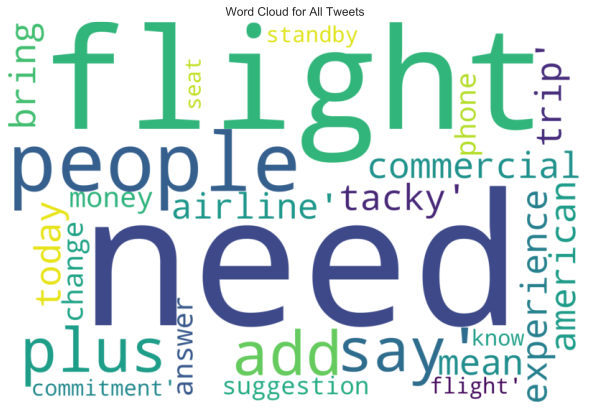

In [23]:

text = df.lemmas_list.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',).generate(str(text))
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud for All Tweets")
plt.show()

### Word Cloud for Positive Sentiment Tweets

This word cloud has been filtered down to those words used in the tweets classified as positive. As one might expect, generally positive-associate words are seen here such as 'thank', 'plus', 'pretty', etc. There are some unusual words such as 'worm' which may warrant further investigation. We will also want to investigate how strongly correlated these words are to positive sentiment. Some words are clearly recurring from the un-filtered word cloud above.

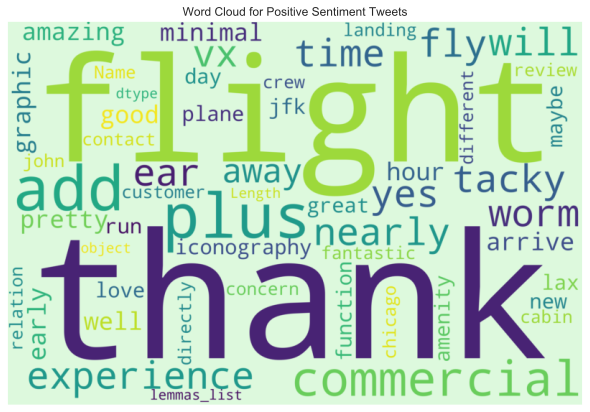

In [24]:
positiveText = df['lemmas_list'].loc[df['airline_sentiment'] == 'positive']
text = positiveText
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = '#DDF9DD',).generate(str(text))
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud for Positive Sentiment Tweets")
plt.show()

### Word Cloud for Neutral Sentiment Tweets

Though neutral tweets do make up a significant portion of our data set, they are less interesting to our business problem as they do not have a clear action to take (either damage control for a negative tweet or use for promotion/marketing on a postive tweet). It is our opinion that some neutral tweets could be classified as either positive or negative if more informatoin such as the full context of the conversation was available. However, some tweets are truly neutral such as those providing generic information.

We cannot interpret the words occuring here too closly at this time, but we hope to investigate further as we progress.

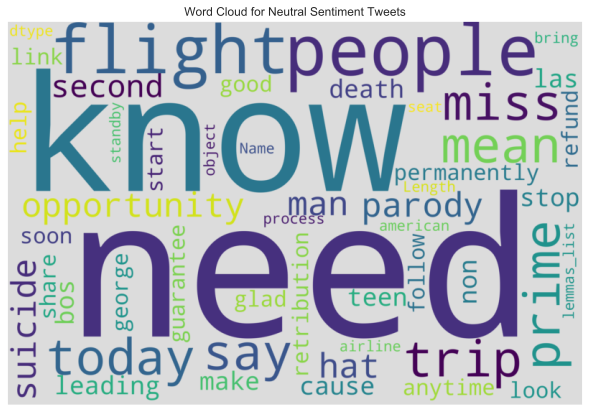

In [25]:
positiveText = df['lemmas_list'].loc[df['airline_sentiment'] == 'neutral']
text = positiveText
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = '#DCDCDC',).generate(str(text))
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud for Neutral Sentiment Tweets")
plt.show()

### Word Cloud for Negative Sentiment Tweets

This selection of words is our most important and final batch. As our problem is primarily the identification of negative tweets, we want to pay close attention to the unique and commonly occuring words in negative tweets, as shown below.

Words such as 'bad', 'late' and 'obnoxious' all carry clear negative connotations in regards to a flight. Some words such as 'seat' and 'entertainment' require a little more interpretation to find the negative correlation. 'Seat' is likely passengers dissatisfied with their airplane seat and 'entertainment' likely refers to complains on the in-flight entertainment.

It seems that this word cloud contains more unique words than the others - this is likely becaues of the unbalanced nature of the dataset (weighting towards negative) giving us more data (more words) to work with. This will be useful to enhance our predictions on negative tweets.

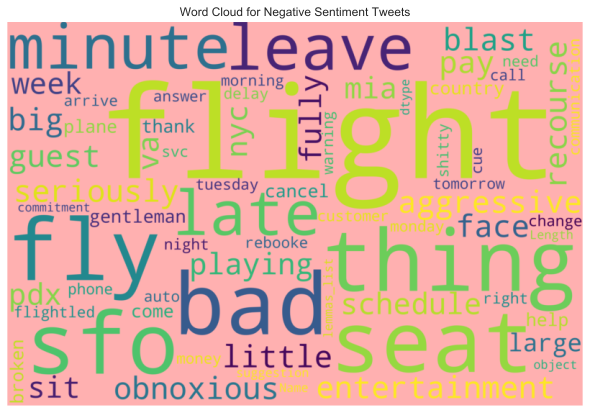

In [26]:
positiveText = df['lemmas_list'].loc[df['airline_sentiment'] == 'negative']
text = positiveText
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = '#FFB0B0',).generate(str(text))
fig = plt.figure(
    figsize = (8, 8),
    facecolor = 'white',
    edgecolor = 'white')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud for Negative Sentiment Tweets")
plt.show()

## Final Thoughts

It is clear to us through the various data preparation and exploration steps taken so far that there is a significant amount of useful information to be gleaned from this data set. Overall, the complexity and amount of work needed in terms of cleanup has been significantly higher than expected. The removal of various short-form English words, slang, twitter functionality, emojiis, hashtags, etc. has been significantly time consuming. It is our hope that the time devoted to this process will result in a superior model at the end of this project.

The exploration of the data has already yielded interesting results, some of which will undoubtedly confonud our classifications and some of which will significantly enhance them.

In all, we remain confident that this was a valuable data set to choose as the issues presented will serve both to enhance our skill as machine learning students and to add value to the difficult-to-produce ML model.